In [5]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

2.4.1


In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1133 - accuracy: 0.7232 - val_loss: 0.4776 - val_accuracy: 0.8831
Epoch 2/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4799 - accuracy: 0.8759 - val_loss: 0.3992 - val_accuracy: 0.8961
Epoch 3/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4152 - accuracy: 0.8883 - val_loss: 0.3662 - val_accuracy: 0.9030
Epoch 4/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3782 - accuracy: 0.8964 - val_loss: 0.3474 - val_accuracy: 0.9066
Epoch 5/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3572 - accuracy: 0.9032 - val_loss: 0.3351 - val_accuracy: 0.9095
Epoch 6/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3527 - accuracy: 0.9023 - val_loss: 0.3274 - val_accuracy: 0.9108
Epoch 7/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3418 - accuracy: 0.9045 - val_loss: 0.3196 - val_ac

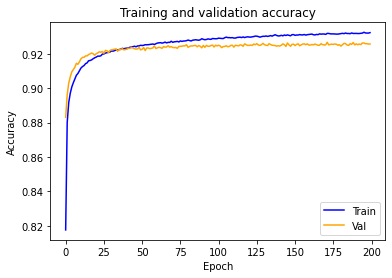

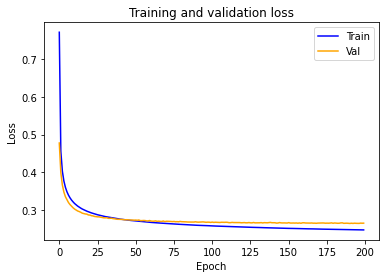

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1049 - accuracy: 0.7848 - val_loss: 0.4765 - val_accuracy: 0.8840
Epoch 2/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4752 - accuracy: 0.8783 - val_loss: 0.3989 - val_accuracy: 0.8954
Epoch 3/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4006 - accuracy: 0.8936 - val_loss: 0.3659 - val_accuracy: 0.9016
Epoch 4/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3794 - accuracy: 0.8977 - val_loss: 0.3473 - val_accuracy: 0.9054
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3610 - accuracy: 0.9010 - val_loss: 0.3348 - val_accuracy: 0.9094
Epoch 6/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3545 - accuracy: 0.9014 - val_loss: 0.3252 - val_accuracy: 0.9107
Epoch 7/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3403 - accuracy: 0.9057 - val_loss: 0.3193 - val_ac

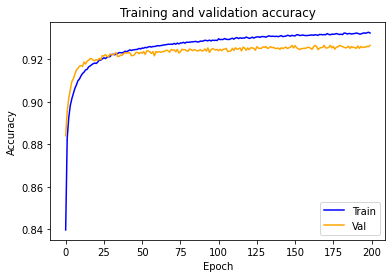

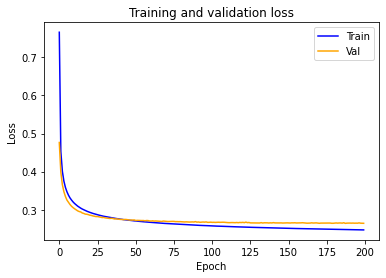

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 52.1174 - accuracy: 0.0988 - val_loss: 30.6860 - val_accuracy: 0.1841
Epoch 2/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 27.1985 - accuracy: 0.2278 - val_loss: 19.5309 - val_accuracy: 0.3402
Epoch 3/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 18.1376 - accuracy: 0.3727 - val_loss: 14.3482 - val_accuracy: 0.4566
Epoch 4/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 13.7419 - accuracy: 0.4717 - val_loss: 11.5850 - val_accuracy: 0.5306
Epoch 5/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 11.1015 - accuracy: 0.5453 - val_loss: 9.9127 - val_accuracy: 0.5843
Epoch 6/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5166 - accuracy: 0.5916 - val_loss: 8.8072 - val_accuracy: 0.6238
Epoch 7/1000
1875/1875 [==============================] - 2s 1ms/step - loss: 8.6474 - accuracy: 0.6226 - val_loss:

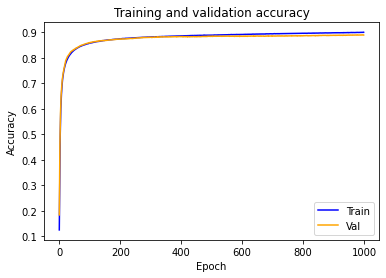

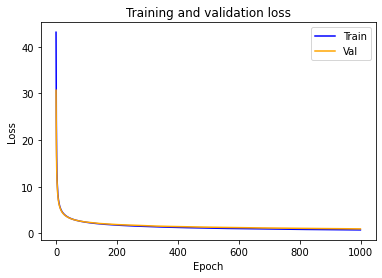

In [10]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=5, seed=20000)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0313 - accuracy: 0.1887 - val_loss: 1.4915 - val_accuracy: 0.4221
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4289 - accuracy: 0.4469 - val_loss: 1.3169 - val_accuracy: 0.4659
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2916 - accuracy: 0.4787 - val_loss: 1.2497 - val_accuracy: 0.4883
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2353 - accuracy: 0.4901 - val_loss: 1.2156 - val_accuracy: 0.4986
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2090 - accuracy: 0.5085 - val_loss: 1.1916 - val_accuracy: 0.5260
Epoch 6/400
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1825 - accuracy: 0.5311 - val_loss: 1.1750 - val_accuracy: 0.5443
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1637 - accuracy: 0.5492 - val_loss: 1.1592 - val_ac

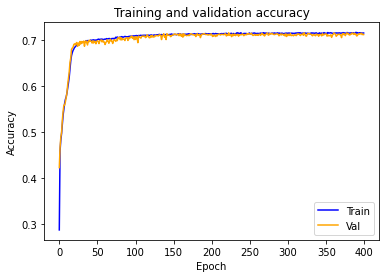

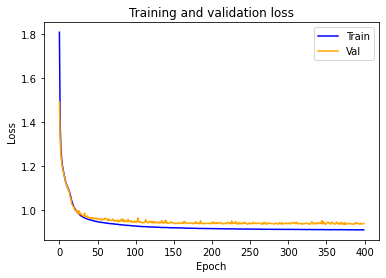

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8866 - accuracy: 0.2778 - val_loss: 1.1259 - val_accuracy: 0.6292
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0145 - accuracy: 0.6747 - val_loss: 0.7253 - val_accuracy: 0.7982
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.8085 - val_loss: 0.5685 - val_accuracy: 0.8362
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5782 - accuracy: 0.8376 - val_loss: 0.5263 - val_accuracy: 0.8489
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5366 - accuracy: 0.8464 - val_loss: 0.5081 - val_accuracy: 0.8535
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5153 - accuracy: 0.8525 - val_loss: 0.4984 - val_accuracy: 0.8561
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5070 - accuracy: 0.8580 - val_loss: 0.4880 - val_ac

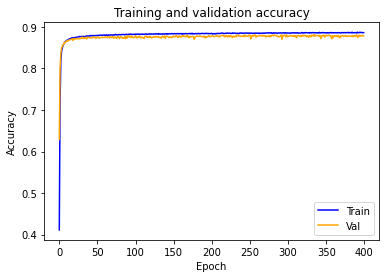

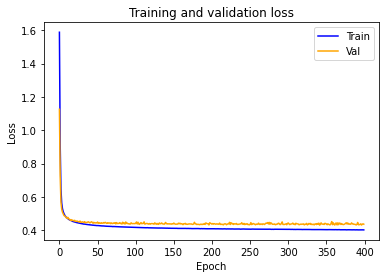

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4870 - accuracy: 0.5320 - val_loss: 0.6189 - val_accuracy: 0.8146
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5821 - accuracy: 0.8274 - val_loss: 0.4865 - val_accuracy: 0.8542
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4751 - accuracy: 0.8627 - val_loss: 0.4310 - val_accuracy: 0.8720
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4268 - accuracy: 0.8760 - val_loss: 0.4021 - val_accuracy: 0.8842
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4015 - accuracy: 0.8848 - val_loss: 0.3890 - val_accuracy: 0.8863
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3925 - accuracy: 0.8884 - val_loss: 0.3744 - val_accuracy: 0.8925
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3786 - accuracy: 0.8916 - val_loss: 0.3668 - val_ac

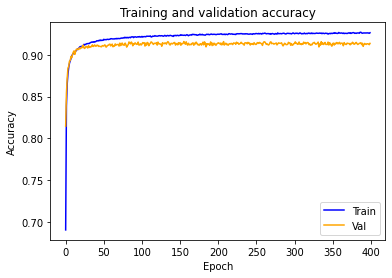

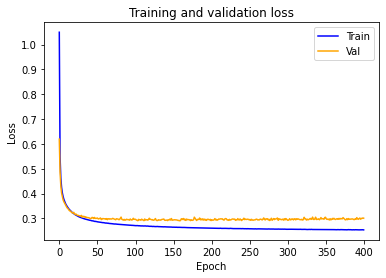

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6286 - accuracy: 0.4553 - val_loss: 0.5767 - val_accuracy: 0.8407
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5564 - accuracy: 0.8449 - val_loss: 0.4411 - val_accuracy: 0.8713
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4457 - accuracy: 0.8750 - val_loss: 0.3922 - val_accuracy: 0.8852
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4022 - accuracy: 0.8852 - val_loss: 0.3682 - val_accuracy: 0.8936
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3759 - accuracy: 0.8931 - val_loss: 0.3551 - val_accuracy: 0.8966
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3602 - accuracy: 0.8955 - val_loss: 0.3440 - val_accuracy: 0.8999
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3485 - accuracy: 0.9007 - val_loss: 0.3404 - val_ac

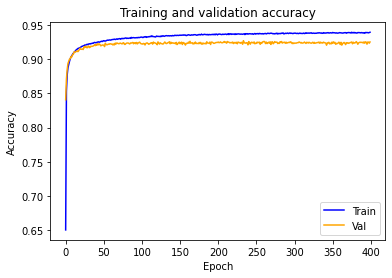

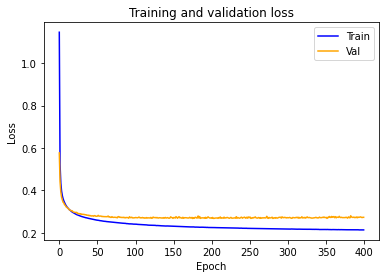

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4155 - accuracy: 0.5400 - val_loss: 0.4766 - val_accuracy: 0.8661
Epoch 2/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4640 - accuracy: 0.8697 - val_loss: 0.3797 - val_accuracy: 0.8911
Epoch 3/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3814 - accuracy: 0.8894 - val_loss: 0.3449 - val_accuracy: 0.8988
Epoch 4/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3534 - accuracy: 0.8992 - val_loss: 0.3262 - val_accuracy: 0.9033
Epoch 5/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3284 - accuracy: 0.9065 - val_loss: 0.3138 - val_accuracy: 0.9086
Epoch 6/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3200 - accuracy: 0.9097 - val_loss: 0.3097 - val_accuracy: 0.9094
Epoch 7/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3130 - accuracy: 0.9093 - val_loss: 0.3018 -

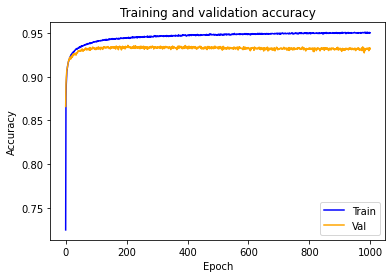

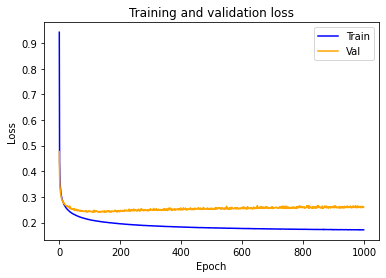

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4465 - accuracy: 0.5291 - val_loss: 0.4658 - val_accuracy: 0.8765
Epoch 2/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4390 - accuracy: 0.8824 - val_loss: 0.3494 - val_accuracy: 0.9030
Epoch 3/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3533 - accuracy: 0.9003 - val_loss: 0.3211 - val_accuracy: 0.9103
Epoch 4/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3346 - accuracy: 0.9041 - val_loss: 0.3023 - val_accuracy: 0.9145
Epoch 5/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3171 - accuracy: 0.9090 - val_loss: 0.2931 - val_accuracy: 0.9155
Epoch 6/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3051 - accuracy: 0.9128 - val_loss: 0.2834 - val_accuracy: 0.9191
Epoch 7/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2922 - accuracy: 0.9157 - val_loss: 0.2763 -

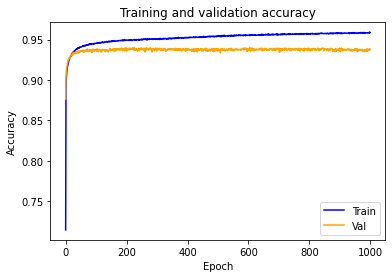

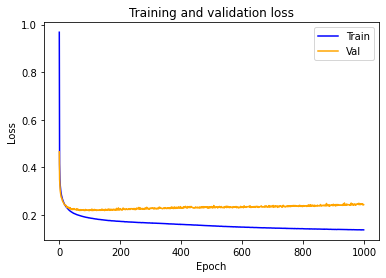

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(9, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5650 - accuracy: 0.4716 - val_loss: 0.5510 - val_accuracy: 0.8436
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5238 - accuracy: 0.8464 - val_loss: 0.4136 - val_accuracy: 0.8841
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4193 - accuracy: 0.8793 - val_loss: 0.3648 - val_accuracy: 0.8941
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3733 - accuracy: 0.8927 - val_loss: 0.3363 - val_accuracy: 0.9033
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3411 - accuracy: 0.9014 - val_loss: 0.3230 - val_accuracy: 0.9055
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3288 - accuracy: 0.9039 - val_loss: 0.3114 - val_accuracy: 0.9118
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3169 - accuracy: 0.9101 - val_loss: 0.3002 - val_ac

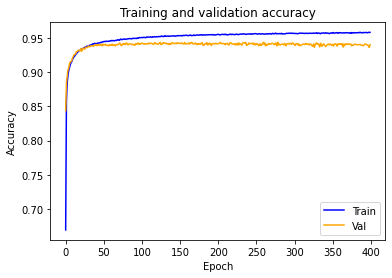

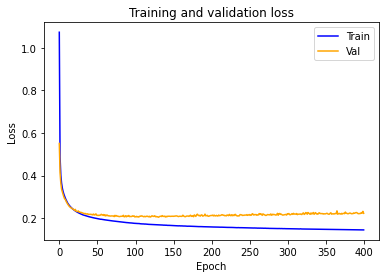

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3643 - accuracy: 0.5822 - val_loss: 0.4340 - val_accuracy: 0.8830
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4161 - accuracy: 0.8828 - val_loss: 0.3365 - val_accuracy: 0.9051
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3437 - accuracy: 0.9045 - val_loss: 0.3050 - val_accuracy: 0.9133
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3159 - accuracy: 0.9120 - val_loss: 0.2869 - val_accuracy: 0.9193
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2910 - accuracy: 0.9166 - val_loss: 0.2706 - val_accuracy: 0.9225
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2823 - accuracy: 0.9207 - val_loss: 0.2582 - val_accuracy: 0.9265
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2670 - accuracy: 0.9243 - val_loss: 0.2500 - val_ac

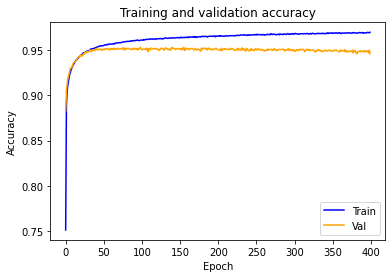

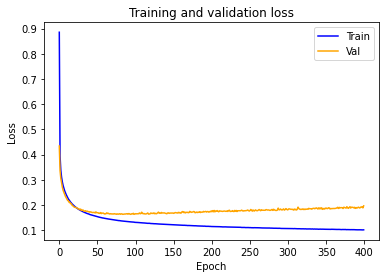

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2487 - accuracy: 0.6383 - val_loss: 0.3954 - val_accuracy: 0.8942
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3909 - accuracy: 0.8910 - val_loss: 0.3313 - val_accuracy: 0.9074
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3359 - accuracy: 0.9061 - val_loss: 0.3084 - val_accuracy: 0.9127
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3095 - accuracy: 0.9126 - val_loss: 0.2952 - val_accuracy: 0.9181
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2963 - accuracy: 0.9168 - val_loss: 0.2870 - val_accuracy: 0.9197
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2931 - accuracy: 0.9180 - val_loss: 0.2825 - val_accuracy: 0.9224
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2731 - val_ac

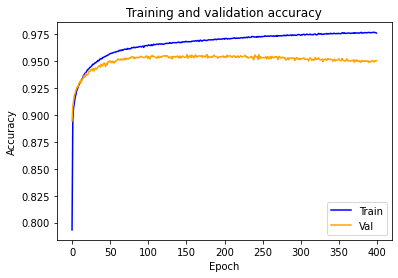

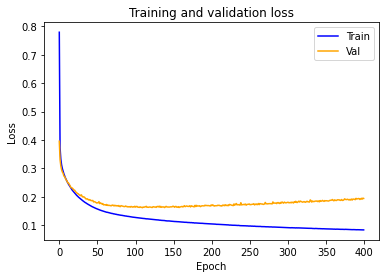

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(14, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2725 - accuracy: 0.6338 - val_loss: 0.3948 - val_accuracy: 0.8905
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3908 - accuracy: 0.8901 - val_loss: 0.3309 - val_accuracy: 0.9102
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3334 - accuracy: 0.9063 - val_loss: 0.2995 - val_accuracy: 0.9182
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3071 - accuracy: 0.9132 - val_loss: 0.2822 - val_accuracy: 0.9208
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2824 - accuracy: 0.9205 - val_loss: 0.2729 - val_accuracy: 0.9228
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9230 - val_loss: 0.2563 - val_accuracy: 0.9286
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2581 - accuracy: 0.9253 - val_loss: 0.2483 - val_ac

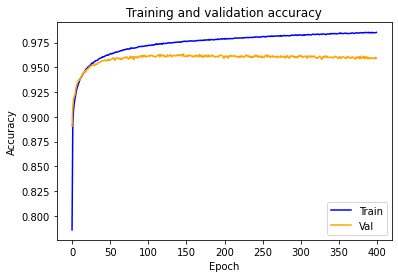

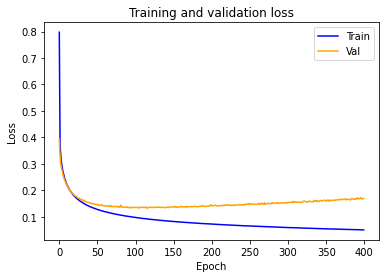

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2474 - accuracy: 0.6278 - val_loss: 0.4004 - val_accuracy: 0.8931
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3972 - accuracy: 0.8922 - val_loss: 0.3205 - val_accuracy: 0.9097
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3311 - accuracy: 0.9052 - val_loss: 0.2954 - val_accuracy: 0.9177
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9135 - val_loss: 0.2779 - val_accuracy: 0.9229
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2826 - accuracy: 0.9185 - val_loss: 0.2652 - val_accuracy: 0.9246
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2688 - accuracy: 0.9240 - val_loss: 0.2562 - val_accuracy: 0.9272
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2543 - accuracy: 0.9279 - val_loss: 0.2454 - val_ac

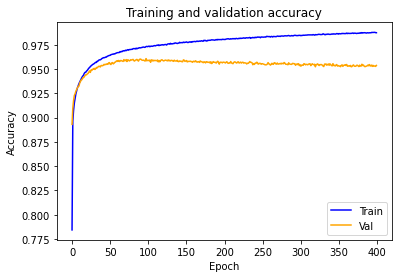

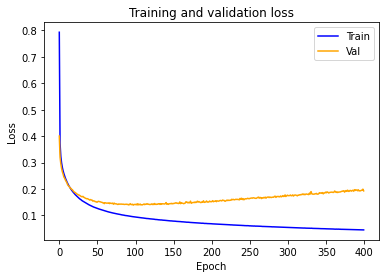

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(18, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/400
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1892 - accuracy: 0.6699 - val_loss: 0.3765 - val_accuracy: 0.8993
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3734 - accuracy: 0.8963 - val_loss: 0.3049 - val_accuracy: 0.9146
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3137 - accuracy: 0.9114 - val_loss: 0.2769 - val_accuracy: 0.9215
Epoch 4/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2853 - accuracy: 0.9200 - val_loss: 0.2554 - val_accuracy: 0.9248
Epoch 5/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2570 - accuracy: 0.9270 - val_loss: 0.2391 - val_accuracy: 0.9314
Epoch 6/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2447 - accuracy: 0.9326 - val_loss: 0.2260 - val_accuracy: 0.9377
Epoch 7/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2297 - accuracy: 0.9344 - val_loss: 0.2153 - val_ac

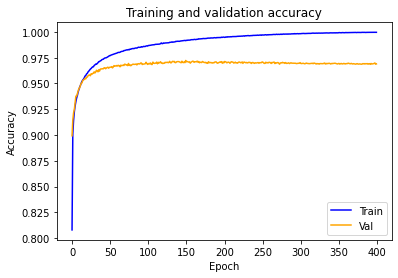

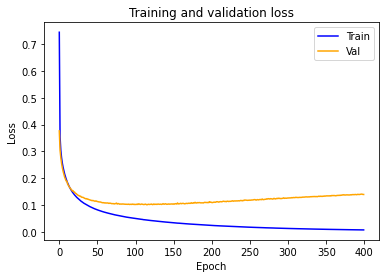

In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

Epoch 1/200
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1301 - accuracy: 0.6957 - val_loss: 0.3725 - val_accuracy: 0.8992
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3705 - accuracy: 0.8978 - val_loss: 0.3039 - val_accuracy: 0.9128
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.9121 - val_loss: 0.2749 - val_accuracy: 0.9210
Epoch 4/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2774 - accuracy: 0.9218 - val_loss: 0.2496 - val_accuracy: 0.9294
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2508 - accuracy: 0.9287 - val_loss: 0.2313 - val_accuracy: 0.9326
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2391 - accuracy: 0.9345 - val_loss: 0.2174 - val_accuracy: 0.9362
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2210 - accuracy: 0.9389 - val_loss: 0.2014 - val_ac

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
  
plot(history)
print(tf.math.confusion_matrix(y_test, tf.argmax(model.predict(x_test), axis=1)))
print(model.summary())
print('max training accuracy', max(history.history['accuracy']))
print('min training loss', min(history.history['loss']))
print('max validation accuracy', max(history.history['val_accuracy']))
print('min validation loss', min(history.history['val_loss']))